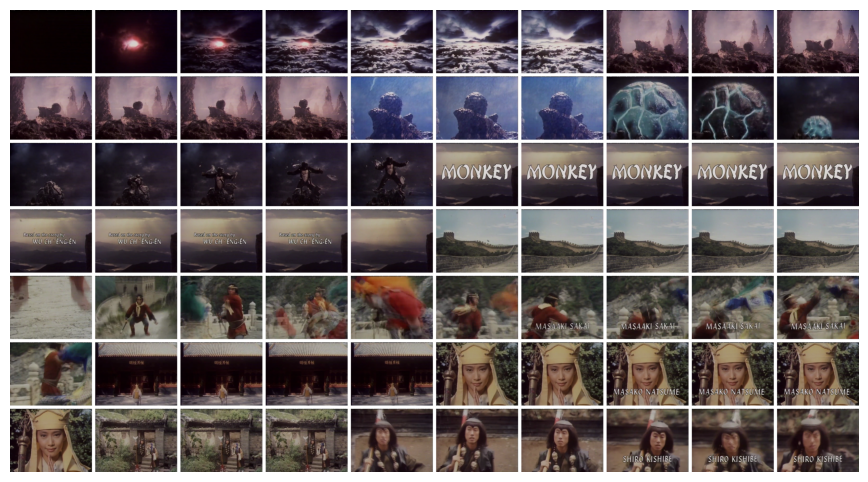

True

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read video file
video_path = "movies/monkey.mp4"  # Replace with your video file path
video_capture = cv2.VideoCapture(video_path)

# Initialize variables
frames = []
grid_shape = (10, 7)  # Grid shape (cols, rows)
border = 5  # Border in pixels
captured_frames = 0
time_interval = 500  # 100ms interval

while captured_frames < grid_shape[0] * grid_shape[1]:
    # Set the video position
    video_capture.set(cv2.CAP_PROP_POS_MSEC, captured_frames * time_interval)
    
    ret, frame = video_capture.read()
    if not ret:
        print("Failed to grab frame")
        break

    # Convert to RGB format (OpenCV loads images in BGR by default)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame_rgb)
    
    captured_frames += 1

video_capture.release()

# Calculate grid dimensions
frame_height, frame_width, _ = frames[0].shape
grid_width = grid_shape[0] * frame_width + (grid_shape[0] - 1) * border * 5
grid_height = grid_shape[1] * frame_height + (grid_shape[1] - 1) * border * 5

# Create an empty grid filled with white
grid = np.ones((grid_height, grid_width, 3), np.uint8) * 255

# Fill in the grid with frames
for i in range(grid_shape[1]):
    for j in range(grid_shape[0]):
        y_start = i * (frame_height + border*5)
        x_start = j * (frame_width + border*5)

        idx = i * grid_shape[0] + j
        if idx >= len(frames):
            break

        grid[y_start:y_start + frame_height, x_start:x_start + frame_width, :] = frames[idx]

# Display the grid using Matplotlib
plt.figure(figsize=(12, 6))
plt.axis('off')
plt.imshow(grid)
plt.show()

# save the grid
cv2.imwrite("grid.png", grid)
